In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
%matplotlib inline

In [37]:
df = pd.read_csv('train_E6oV3lV.csv')

In [38]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [39]:
df.groupby('label').count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


In [40]:
df1 = df.query('label==1').sample(frac=1.0)

In [41]:
df1.shape

(2242, 3)

In [42]:
n_df = pd.concat([df,df1],ignore_index=True)
n_df.groupby('label').count()

,id,tweet
label,,
0,29720,29720
1,4484,4484


In [43]:
count_class_0, count_class_1 = df['label'].value_counts()

In [44]:
df_class_0 =  df.query('label==0')
df_class_1 =  df.query('label==1')

In [45]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1],ignore_index=True ,axis=0)

In [46]:
df_under.shape

(4484, 3)

In [47]:
df_under.groupby('label').count()

,id,tweet
label,,
0,2242,2242
1,2242,2242


In [48]:
df = df_under

In [49]:
X = df['tweet']
Y = df['label']
Y_org = Y

In [50]:
from keras.preprocessing.text import Tokenizer
max_features = 10000
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', split=' ', lower=True, char_level=False, oov_token=None)
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)

# add padding
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, maxlen=400)

In [51]:
max(df['tweet'], key=len)

'im getting my ps4 tomorrow ð\x9f\x98±ð\x9f\x92\x96ð\x9f\x98±ð\x9f\x92\x96ð\x9f\x92\x96ð\x9f\x92\x96ð\x9f\x92\x96ð\x9f\x98±ð\x9f\x98±ð\x9f\x98±ð\x9f\x92\x96ð\x9f\x92\x96ð\x9f\x92\x96ð\x9f\x92\x96ð\x9f\x98±ð\x9f\x92\x96ð\x9f\x98±ð\x9f\x98±ð\x9f\x98±ð\x9f\x98±ð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8d cant wait #ps4 #gamer   #omg #otaku #yas'

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit(X).transform(X)

C:\Users\Vaibhav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 35)
pca.fit(X)
X = pca.transform(X);

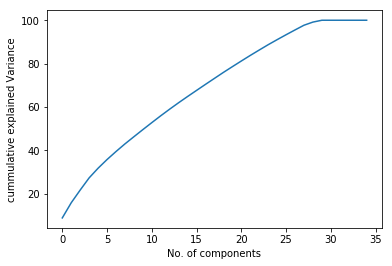

In [54]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state= 42)

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [57]:
classifier = Sequential()
classifier.add(Dense(units= 20,kernel_initializer= 'uniform', activation='relu' ,input_dim =X.shape[1]))
classifier.add(Dropout(0.1))

In [58]:
classifier.add(Dense(units= 20,kernel_initializer= 'uniform', activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units= 20,kernel_initializer= 'uniform', activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(2,kernel_initializer='uniform', activation='sigmoid'))

In [59]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

In [60]:
from sklearn.preprocessing import OneHotEncoder
y_e = OneHotEncoder()
Y_train_org = Y_train
Y_test_org = Y_test
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
y_e.fit(Y_train)
Y_train = y_e.transform(Y_train)
Y_test = y_e.transform(Y_test)

In [61]:
Y_train

<3587x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3587 stored elements in Compressed Sparse Row format>

In [62]:
Y_test

<897x2 sparse matrix of type '<class 'numpy.float64'>'
	with 897 stored elements in Compressed Sparse Row format>

In [63]:
checker = classifier.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data = (X_test, Y_test))

Train on 3587 samples, validate on 897 samples
Epoch 1/100
3587/3587 [==============================] - 2s 438us/step - loss: 0.6912 - acc: 0.5749 - val_loss: 0.6779 - val_acc: 0.6572
Epoch 2/100
3587/3587 [==============================] - 1s 148us/step - loss: 0.6402 - acc: 0.6649 - val_loss: 0.6390 - val_acc: 0.6577
Epoch 3/100
3587/3587 [==============================] - 0s 100us/step - loss: 0.6251 - acc: 0.6709 - val_loss: 0.6356 - val_acc: 0.6605
Epoch 4/100
3587/3587 [==============================] - 0s 109us/step - loss: 0.6219 - acc: 0.6762 - val_loss: 0.6357 - val_acc: 0.6577
Epoch 5/100
3587/3587 [==============================] - 0s 93us/step - loss: 0.6212 - acc: 0.6781 - val_loss: 0.6363 - val_acc: 0.6544
Epoch 6/100
3587/3587 [==============================] - 0s 93us/step - loss: 0.6126 - acc: 0.6864 - val_loss: 0.6385 - val_acc: 0.6600
Epoch 7/100
3587/3587 [==============================] - 0s 107us/step - loss: 0.6167 - acc: 0.6857 - val_loss: 0.6346 - val_acc: 0.6

3587/3587 [==============================] - 0s 86us/step - loss: 0.5216 - acc: 0.7540 - val_loss: 0.6104 - val_acc: 0.6968
Epoch 61/100
3587/3587 [==============================] - 0s 85us/step - loss: 0.5183 - acc: 0.7520 - val_loss: 0.6122 - val_acc: 0.7012
Epoch 62/100
3587/3587 [==============================] - 0s 88us/step - loss: 0.5168 - acc: 0.7497 - val_loss: 0.6108 - val_acc: 0.7057
Epoch 63/100
3587/3587 [==============================] - 0s 95us/step - loss: 0.5088 - acc: 0.7582 - val_loss: 0.6179 - val_acc: 0.7046
Epoch 64/100
3587/3587 [==============================] - 0s 92us/step - loss: 0.5272 - acc: 0.7478 - val_loss: 0.6102 - val_acc: 0.7051
Epoch 65/100
3587/3587 [==============================] - 0s 91us/step - loss: 0.5141 - acc: 0.7572 - val_loss: 0.6054 - val_acc: 0.7079
Epoch 66/100
3587/3587 [==============================] - 0s 84us/step - loss: 0.5118 - acc: 0.7579 - val_loss: 0.6088 - val_acc: 0.7079
Epoch 67/100
3587/3587 [==============================

In [64]:
Y_pred_test_label = classifier.predict(X_test)
y_pred_test=np.argmax(Y_pred_test_label,axis =1)
y_pred_test
Y_pred_train_label = classifier.predict(X_train)
y_pred_train = np.argmax(Y_pred_train_label,axis=1)
Y_test_true = Y_test_org.astype(np.int)
Y_train_true = Y_train_org.astype(np.int)

In [65]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_true,y_pred_test))

             precision    recall  f1-score   support

          0       0.76      0.59      0.66       443
          1       0.67      0.82      0.74       454

avg / total       0.72      0.71      0.70       897



In [66]:
print(classification_report(Y_train_true,y_pred_train))

             precision    recall  f1-score   support

          0       0.88      0.69      0.77      1799
          1       0.74      0.90      0.82      1788

avg / total       0.81      0.80      0.79      3587



In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
### for softmax function
print("TRAIN:  \n",confusion_matrix(y_pred_train,Y_train_true))
print("\nTest:  \n",confusion_matrix(y_pred_test,Y_test_true))

TRAIN:  
 [[1240  173]
 [ 559 1615]]

Test:  
 [[260  81]
 [183 373]]


In [69]:
### for sigmoid function
print("TRAIN:  \n",confusion_matrix(y_pred_train,Y_train_true))
print("\nTest:  \n",confusion_matrix(y_pred_test,Y_test_true))

TRAIN:  
 [[1240  173]
 [ 559 1615]]

Test:  
 [[260  81]
 [183 373]]
